# Random Walk

A random walk is a sequence of random steps in space or time

Kabui, Charles  
2025-03-17

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/computational-techniques-in-data-science/random-walk/index.html) -- [Download as Notebook](https://toknow.ai/posts/computational-techniques-in-data-science/random-walk/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/computational-techniques-in-data-science/random-walk/index.pdf)
 *** 

A random walk is a mathematical model that describes a path consisting
of a series of random steps.

If $X_n$ represents the position at step $n$, then:

$X_n = X_{n−1} + S_n$

where $S_n$ is a random step, typically drawn from a probability
distribution (e.g., uniform, normal, or Bernoulli).

## 1D Random Walk (One-Dimensional)

A 1D random walk occurs when movement is restricted to a single axis
(e.g., left or right along a line). At each step, the walker moves left
(-1) or right (+1) with equal probability (if unbiased).

Example: Stock prices

## 2D Random Walk (Two-Dimensional)

A 2D random walk allows movement in two perpendicular directions (x and
y). At each step, the walker can move up, down, left, or right.

Example: Brownian motion

## Applications

#### Imports and Shared Python code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# For reproducibility
np.random.seed(37) 

# Function to perform a single random walk
def random_walk_1D(steps: int, p: float):
    """Simulate a 1D biased random walk."""
    moves = np.random.choice([-1, 1], size=steps, p=[1-p, p])
    position = np.cumsum(moves)  # Cumulative sum to get position over time
    return position

### 1. Simulating a 1D Random Walk with Step Bias

A particle moves along a one-dimensional line (1D). At each time step,
it can either move:

-   +1 step to the right with probability `p`, or
-   -1 step to the left with probability `1−p`

Suppose `p=0.85` (i.e., a bias to the right).

Instructions:

1.  Write a Python program to simulate a 1D random walk with 1000 steps
    where:
    -   The starting position is 0.
    -   Each step has a probability of p=0.85 to move right and 1−p=0.15
        to move left.
2.  Plot the position vs time graph (time on x-axis, position on
    y-axis).
3.  Run the simulation five times and overlay all five random walks in
    the same graph.
4.  Calculate and interpret:
    -   The final position of the particle after 1000 steps.
    -   The mean and standard deviation of the final position across
        five simulations.

#### Answer

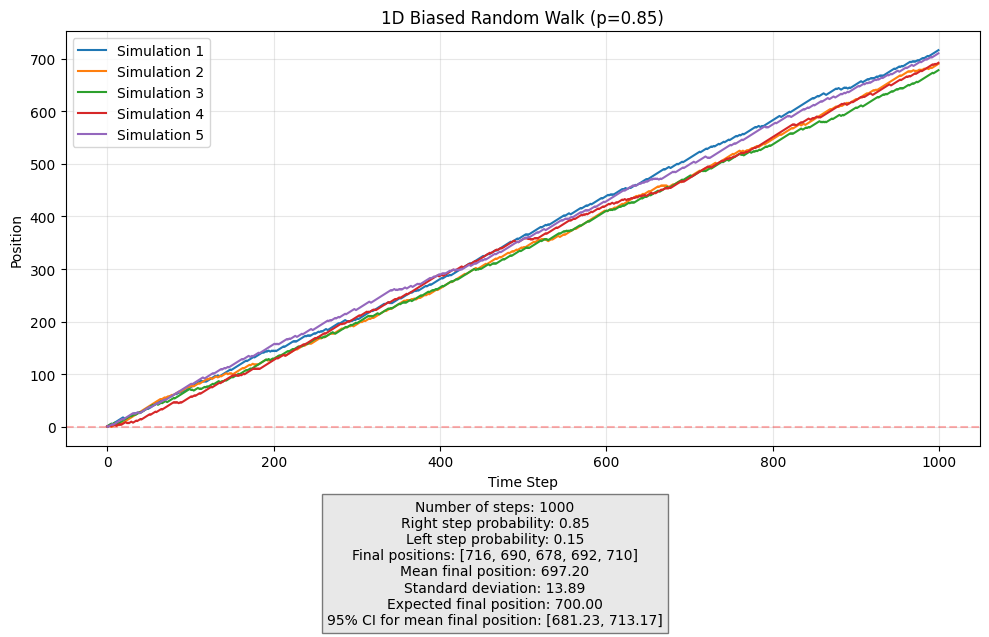

Number of steps: 1000
Right step probability: 0.85
Left step probability: 0.15
Final positions: [716, 690, 678, 692, 710]
Mean final position: 697.20
Standard deviation: 13.89
Expected final position: 700.00
95% CI for mean final position: [681.23, 713.17]

In [5]:
def create_random_walk_1():
    num_simulations = 5
    steps = 1000
    # Probability of moving right
    prob_right = 0.85
    
    times = range(steps)
    final_positions = []

    fig, ax = plt.subplots(figsize=(10, 6))

    # Run simulations and plot
    for i in range(num_simulations):
        positions = random_walk_1D(steps, prob_right)
        final_positions.append(positions[-1])  # Store final position
        plt.plot(times, positions, label=f"Simulation {i+1}")

    # Plot settings
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.3)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Position")
    ax.set_title(f"1D Biased Random Walk (p={prob_right})")
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Compute statistics
    final_positions = np.array(final_positions)
    mean_final_position = np.mean(final_positions)
    std_final_position = np.std(final_positions)
    expected_final_position = steps * (2 * prob_right - 1)
    confidence_interval_95 = stats.t.interval(
        0.95,  # Confidence level - 95%
        num_simulations, # Degrees of freedom
        loc = mean_final_position, # Sample mean
        # Standard error
        scale = std_final_position / np.sqrt(len(final_positions))
    )
    stats_text = (
        f"Number of steps: {steps}\n"
        f"Right step probability: {prob_right}\n"
        f"Left step probability: {(1-prob_right):.2f}\n"
        f"Final positions: {[int(pos) for pos in final_positions]}\n"
        f"Mean final position: {mean_final_position:.2f}\n"
        f"Standard deviation: {std_final_position:.2f}\n"
        f"Expected final position: {expected_final_position:.2f}\n"
        "95% CI for mean final position: "
        f"[{confidence_interval_95[0]:.2f}, {confidence_interval_95[1]:.2f}]"
    )

    fig.text(
        0.5, -0.1, stats_text, ha="center", fontsize=10, 
        bbox={"facecolor":"lightgray", "alpha":0.5})
    fig.tight_layout(rect=[0, 0.1, 1, 0.95]) 
    plt.show()
    print(stats_text)

create_random_walk_1()

#### Interpretation of the Results

1.  **Bias Towards the Right:**
    -   The particle has a high probability (`p = 0.85`) of moving
        right, leading to a **strong rightward drift** in position.  
    -   If the movement were unbiased (`p = 0.5`), we would expect the
        particle to stay near **0** on average.
2.  **Final Positions:**
    -   The five simulations resulted in final positions: **\[716, 690,
        678, 692, 710\]**.  
    -   These values are all **positive and close to each other**,
        confirming the expected bias.
3.  **Mean vs Expected Position:**
    -   The **mean final position** from simulations is **697.20**,
        which is **close to the expected value** of **700**.  
    -   The small difference arises due to random fluctuations (noise)
        in each walk.
4.  **Spread of Final Positions:**
    -   The **standard deviation** is **13.89**, indicating that the
        final position varies by about `±13.89` steps from the mean
        across different runs.  
    -   Since the standard deviation is relatively small compared to
        1000 steps, the bias dominates, keeping walks **close to the
        expected mean**.
5.  **Confidence Interval (95% CI):**
    -   The **confidence interval \[681.23, 713.17\]** suggests that, if
        we were to run many more simulations, the **true mean final
        position** would lie within this range **95% of the time**.  
    -   Since the expected position **700** is well within this range,
        our simulations align well with theoretical predictions.

### 2. Comparing 1D Random Walks with and without Drift

Suppose two particles perform 1D random walks starting from position
0: - Particle A: Moves with a drift, i.e., p=0.7 (70% chance to move
right). - Particle B: Moves without drift, i.e., p=0.5(equal probability
both sides).

Instructions:

1.  Write a Python program to simulate 1000 steps for each particle.
2.  Plot both random walks on the same graph with:
    -   Time on the x-axis.
    -   Position on the y-axis.
    -   Different colors for each particle.
3.  Calculate and display:
    -   The mean and standard deviation of the final position after 1000
        steps.
4.  Interpret your answer

#### Answer

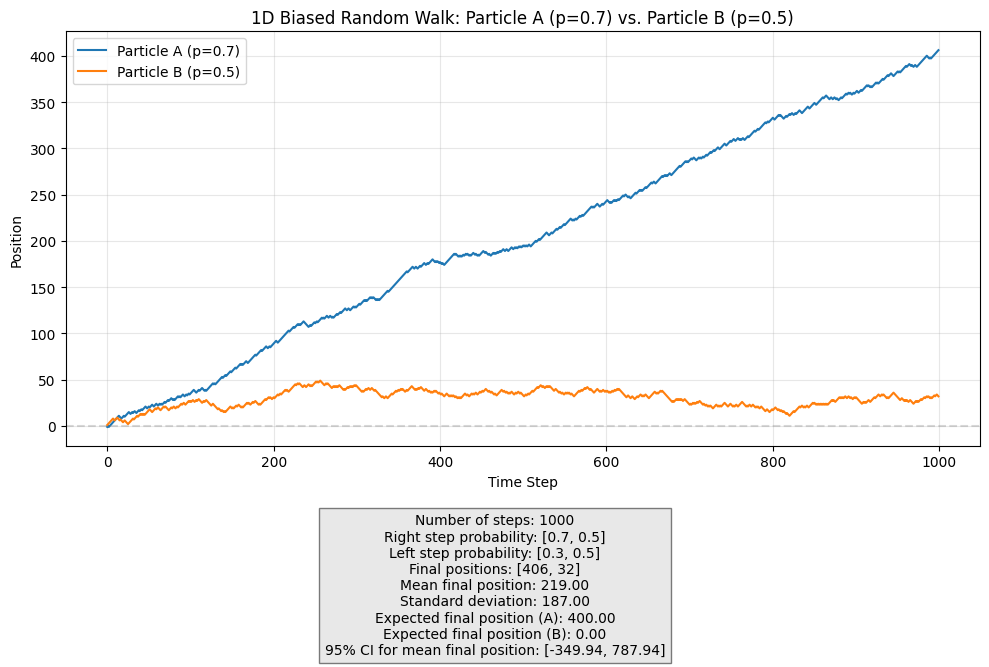

Number of steps: 1000
Right step probability: [0.7, 0.5]
Left step probability: [0.3, 0.5]
Final positions: [406, 32]
Mean final position: 219.00
Standard deviation: 187.00
Expected final position (A): 400.00
Expected final position (B): 0.00
95% CI for mean final position: [-349.94, 787.94]

In [6]:
def create_random_walk_2():
    steps = 1000
    times = range(steps)
    final_positions = []

    plt.figure(figsize=(10, 6))

    # Particle A: Moves with a drift, 
    # i.e., p=0.7 (70% chance to move right).
    positionsA = random_walk_1D(steps, 0.7)
    final_positions.append(positionsA[-1])  # Store final position
    plt.plot(times, positionsA, label=f"Particle A (p=0.7)")

    # Particle B: Moves without drift, 
    # i.e., p=0.5(equal probability both sides).
    positionsB = random_walk_1D(steps, 0.5)
    final_positions.append(positionsB[-1])  # Store final position
    plt.plot(times, positionsB, label=f"Particle B (p=0.5)")

    # Plot settings
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    plt.xlabel("Time Step")
    plt.ylabel("Position")
    plt.title(
        f"1D Biased Random Walk: Particle A (p=0.7) vs. Particle B (p=0.5)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Compute statistics
    final_positions = np.array(final_positions)
    mean_final_position = np.mean(final_positions)
    std_final_position = np.std(final_positions)
    expected_final_position_A = steps * (2 * 0.7 - 1)
    expected_final_position_B = steps * (2 * 0.5 - 1)
    confidence_interval_95 = stats.t.interval(
        0.95,  # Confidence level - 95%
        2, # Degrees of freedom
        loc = mean_final_position, # Sample mean
        # Standard error
        scale = std_final_position / np.sqrt(len(final_positions))
    )
    stats_text = (
        f"Number of steps: {steps}\n"
        f"Right step probability: {[0.7, 0.5]}\n"
        f"Left step probability: {[0.3, 0.5]}\n"
        f"Final positions: {[int(pos) for pos in final_positions]}\n"
        f"Mean final position: {mean_final_position:.2f}\n"
        f"Standard deviation: {std_final_position:.2f}\n"
        f"Expected final position (A): {expected_final_position_A:.2f}\n"
        f"Expected final position (B): {expected_final_position_B:.2f}\n"
        "95% CI for mean final position: "
        f"[{confidence_interval_95[0]:.2f}, {confidence_interval_95[1]:.2f}]"
    )

    plt.figtext(
        0.5, -0.15, stats_text, ha="center", fontsize=10, 
        bbox={"facecolor":"lightgray", "alpha":0.5})
    plt.tight_layout(rect=[0, 0.1, 1, 0.95]) 
    plt.show()
    print(stats_text)

create_random_walk_2()

#### Interpretation of the Answer

1.  **Observed vs. Expected Behavior**  

-   **Particle A (with drift)** ended up at **406**, which is close to
    its expected final position of **400** (since
    $\mathbb{E}[X_A] = (2p - 1) \times N = (2(0.7) - 1) \times 1000 = 400$).  
-   **Particle B (without drift)** ended up at **32**, which is close to
    the expected value of **0**.  
-   The **mean final position** (219.00) reflects the contribution of
    both particles, primarily influenced by Particle A.

1.  **Variability & Standard Deviation**  

-   The **standard deviation (187.00)** indicates a significant spread
    in possible final positions.  
-   This is expected, as **random walks have inherent variance**.

1.  **Confidence Interval Analysis**  

-   The **95% confidence interval** for the mean final position is
    **\[-349.94, 787.94\]**.  
-   This wide range suggests that while Particle A tends to drift right,
    there is **considerable randomness** in individual runs.

### 3. Simulating a 2D Random Walk (Unbiased)

A mosquito trapped in a square grid moves randomly: - Up, Down, Left, or
Right with equal probability (25%) in each direction. - The mosquito
starts at coordinate (0,0).

Instructions:

1.  Write a Python program to simulate a 2D random walk for 500 steps.
2.  Plot the path of the mosquito (X vs Y) using a scatter plot or line
    plot.
3.  Calculate and display:
    -   The final position after 500 steps.
    -   The total distance from the origin after 500 steps.
4.  Run the simulation 10 times and calculate:
    -   The average distance from the origin after 500 steps.
    -   The standard deviation of the distance.
5.  Interpret your answer

#### Answer

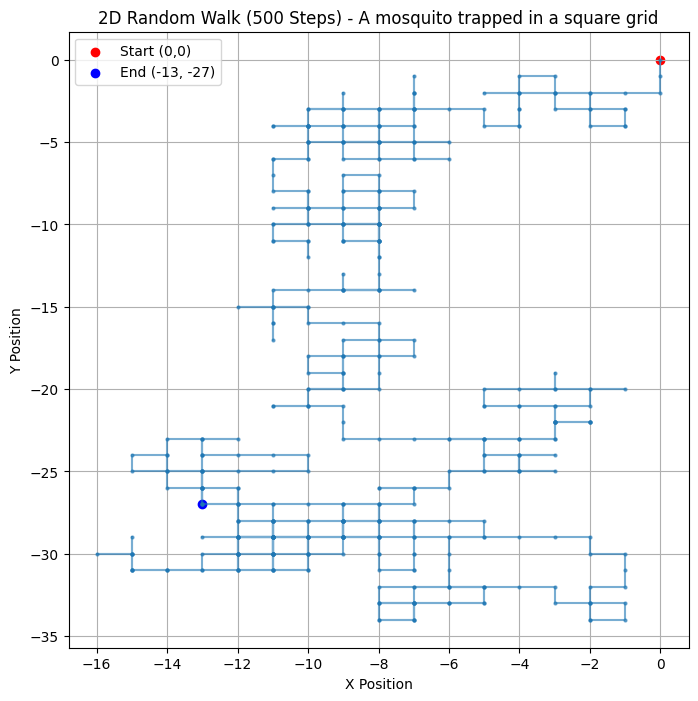

Number of steps: 500
Distances: [29, 6, 15, 32, 14, 29, 20, 21, 34, 31]
Final position after 500 steps in first run: [25 19]
Distance from origin in first run: 29.97
Average distance from origin over 10 runs: 23.65
Standard deviation of distance: 9.06

In [ ]:
def create_random_walk_3():
    steps = 500
    def random_walk_2D(steps: int):
        # Define possible moves (Up, Down, Left, Right)
        moves = np.array([[0, 1], [0, -1], [-1, 0], [1, 0]])
        # Starting position (0,0)
        position = np.array([0, 0])
        path = [position.copy()]
        for _ in range(steps):
            step = moves[np.random.choice(4)]  # Choose a random move
            position += step  # Update position
            path.append(position.copy())
        return np.array(path), position

    def plot_walk(path):
        plt.figure(figsize=(8, 8))
        plt.plot(
            path[:, 0], path[:, 1], marker='o', markersize=2, 
            linestyle='-', alpha=0.6)
        plt.scatter(0, 0, c='red', marker='o', label='Start (0,0)')
        plt.scatter(
            path[-1, 0], path[-1, 1], c='blue', marker='o', 
            label=f'End {tuple(path[-1].tolist())}')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.title((
            '2D Random Walk (500 Steps) - '
            'A mosquito trapped in a square grid'))
        plt.legend()
        plt.grid()
        plt.show()

    # Run simulation 10 times and gather results
    num_simulations = 10
    distances = []
    final_positions = []

    for _ in range(num_simulations):
        path, final_position = random_walk_2D(steps)
        # Euclidean distance from origin
        distance = np.linalg.norm(final_position)  
        distances.append(distance)
        final_positions.append(final_position)
        if _ == 0:  # Plot first simulation
            plot_walk(path)

    # Compute statistics
    average_distance = np.mean(distances)
    std_dev_distance = np.std(distances)

    stats_text = (
        f"Number of steps: {steps}\n"
        f"Distances: {[int(dist) for dist in distances]}\n"
        f"Final position after 500 steps in first run: {final_position}\n"
        f"Distance from origin in first run: {distances[0]:.2f}\n"
        f"Average distance from origin over {num_simulations} "
        f"runs: {average_distance:.2f}\n"
        f"Standard deviation of distance: {std_dev_distance:.2f}"
    )
    # Display results
    print(stats_text)

create_random_walk_3()

#### Explanation of the Result:

1.  **Final position after 500 steps in the first run: `[25, 19]`**
    -   This means that after 500 random steps, the mosquito ended up at
        coordinates (9 -29) on the grid.
    -   The displacement is not necessarily centered around (0,0) due to
        randomness.
2.  **Distance from origin in the first run: `29.97`**
    -   The Euclidean distance from the origin $(0,0)$ is given by:

        $d = \sqrt{(-7)^2 + (-35)^2} = \sqrt{49 + 1225} = \sqrt{1274} \approx 22.09$

    -   This measures how far the mosquito moved from the starting point
        after 500 steps.
3.  **Average distance from origin over 10 runs: `23.65`**
    -   This is the mean of the final distances over 10 independent
        simulations.

    -   Even though the mosquito moves randomly, the expected distance
        from the origin is approximately proportional to the square root
        of the number of steps:

        $E[d] \approx \sqrt{500} \approx 22.36$

    -   The observed average of `9.06` is lower, due to random variation
        in the limited number of simulations.
4.  **Standard deviation of distance: `9.06`**
    -   This represents the spread of distances across 10 runs.

### 4. Comparing 2D Random Walks with Bias vs No Bias

A person walks randomly in a 2D grid but with a slight bias towards the
East (right).

In each step: - Move East: 40% probability - Move West: 20%
probability - Move North: 20% probability - Move South: 20% probability

The person starts at (0,0). Instructions:

1.  Write a Python program to simulate:
    -   500 steps for the biased random walk.
    -   500 steps for an unbiased random walk (equal probability).
2.  Plot both paths on the same graph with:
    -   Different colors for each walk.
    -   Scatter plot showing the final position.
3.  Calculate and display:
    -   The final position after 500 steps.
    -   The total distance from the origin for both walks.
4.  Run the simulation 10 times and compute:
    -   The average distance from the origin for both biased and
        unbiased walks.
    -   The standard deviation of the distance.
5.  Interpretation:
    -   Why does the biased random walk drift to the east?
    -   How does drift affect the standard deviation of the final
        position?
    -   What real-world phenomena could this simulation represent (e.g.,
        wind drift, ocean currents)?

#### Answer

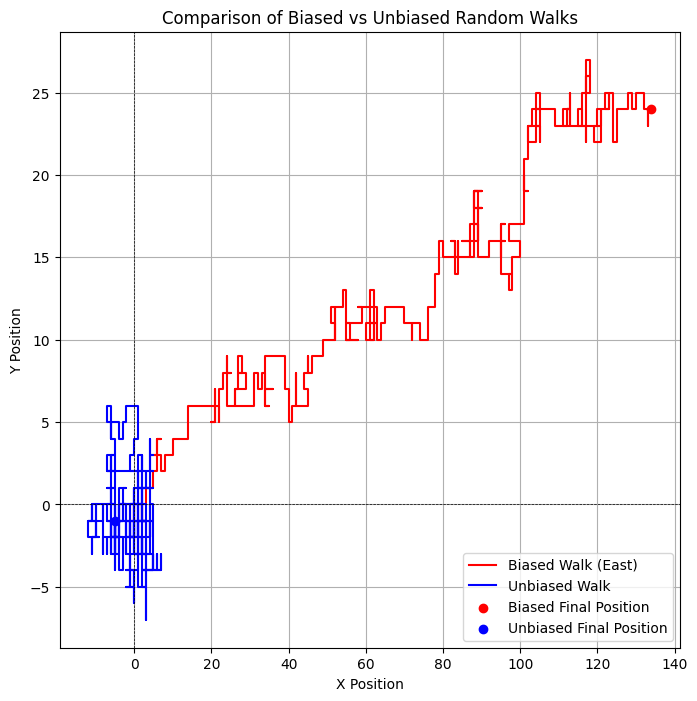

Biased Walk - Avg Distance: 106.75, Std Dev: 14.60
Unbiased Walk - Avg Distance: 19.53, Std Dev: 9.80

In [ ]:
def create_random_walk_4():
    def random_walk(steps, biased=False):
        x, y = [0], [0]  # Start at origin
        
        for _ in range(steps):
            direction = np.random.choice(
                ['E', 'W', 'N', 'S'], 
                p=[0.4, 0.2, 0.2, 0.2] if biased 
                else [0.25, 0.25, 0.25, 0.25])
            
            if direction == 'E':
                x.append(x[-1] + 1)
                y.append(y[-1])
            elif direction == 'W':
                x.append(x[-1] - 1)
                y.append(y[-1])
            elif direction == 'N':
                x.append(x[-1])
                y.append(y[-1] + 1)
            else:  # 'S'
                x.append(x[-1])
                y.append(y[-1] - 1)
        
        return x, y

    def plot_walks(biased_walk, unbiased_walk):
        plt.figure(figsize=(8, 8))
        plt.plot(*biased_walk, label='Biased Walk (East)', color='red')
        plt.plot(*unbiased_walk, label='Unbiased Walk', color='blue')
        plt.scatter(
            *biased_walk[:, -1], color='red', marker='o', 
            label='Biased Final Position')
        plt.scatter(
            *unbiased_walk[:, -1], color='blue', marker='o', 
            label='Unbiased Final Position')
        plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title("Comparison of Biased vs Unbiased Random Walks")
        plt.grid()
        plt.show()

    def distance_from_origin(position):
        return np.sqrt(position[0]**2 + position[1]**2)

    # Run simulations
    num_simulations = 10
    biased_distances = []
    unbiased_distances = []

    for _ in range(num_simulations):
        biased_walk = np.array(random_walk(500, biased=True))
        unbiased_walk = np.array(random_walk(500, biased=False))
        
        biased_final = biased_walk[:, -1]
        unbiased_final = unbiased_walk[:, -1]
        
        biased_distances.append(distance_from_origin(biased_final))
        unbiased_distances.append(distance_from_origin(unbiased_final))
        
        if _ == 0:  # Plot only one example
            plot_walks(biased_walk, unbiased_walk)

    stats_text = (
        "Biased Walk - "
        f"Avg Distance: {np.mean(biased_distances):.2f}, "
        f"Std Dev: {np.std(biased_distances):.2f}"
        "\n"
        "Unbiased Walk - "
        f"Avg Distance: {np.mean(unbiased_distances):.2f}, "
        f"Std Dev: {np.std(unbiased_distances):.2f}"
    )
    # Display results
    print(stats_text)

create_random_walk_4()

#### Interpretation of Results

1.  **Why does the biased random walk drift east?** The biased walk has
    a **higher probability (40%)** of moving east compared to the other
    directions (20% each). Over many steps, this bias accumulates,
    causing the walker to drift significantly in the **eastward
    direction**. The longer the walk, the more pronounced this drift
    becomes.

2.  **How does drift affect the standard deviation?**

-   The **average distance from the origin** for the biased walk
    (106.75) is much greater than the unbiased walk (19.53). This is
    because the consistent eastward bias creates a large displacement.
-   The **standard deviation** of the biased walk (14.60) is also larger
    than that of the unbiased walk (9.80). This suggests that while most
    biased walks follow the general eastward trend, there is still some
    variability due to the random movements in other directions.
-   In contrast, the unbiased walk spreads more symmetrically, resulting
    in a **lower average distance** and **lower standard deviation**.

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***